In [1]:
from pathlib import Path

import pandas as pd

In [2]:
FILE_NAME = 'dataset.csv'

In [3]:
df = pd.read_csv(
    (
        Path().resolve().parent
        .joinpath('data')
        .joinpath('processed')
        .joinpath(FILE_NAME)
    ),
    parse_dates=[4]
)

In [10]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95541 entries, 0 to 95540
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   location    95541 non-null  object        
 1   river_post  95541 non-null  object        
 2   post_id     95541 non-null  int64         
 3   legend      61915 non-null  object        
 4   date        95541 non-null  datetime64[ns]
 5   gauge_zero  95541 non-null  float64       
 6   value       94688 non-null  float64       
 7   combined    94688 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 5.8+ MB
            post_id   gauge_zero         value      combined
count  95541.000000  95541.00000  94688.000000  94688.000000
mean    9428.059922    184.85535    264.560525    449.394401
std       52.750206    114.60195    237.923589    223.163924
min     9386.000000     14.02000      0.000000     91.800000
25%     9393.000000     70

In [7]:
df['combined'] = df['gauge_zero'].add(df['value'])

/Users/alexandermikhailov/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


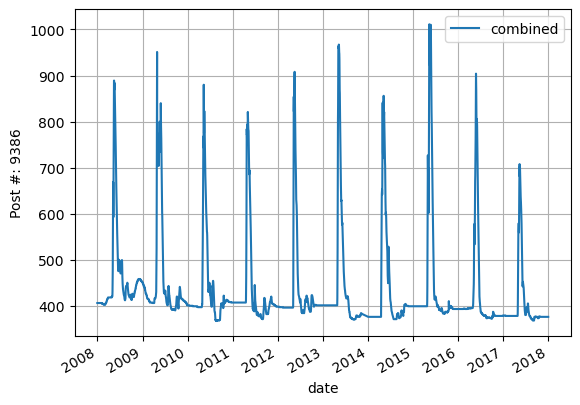

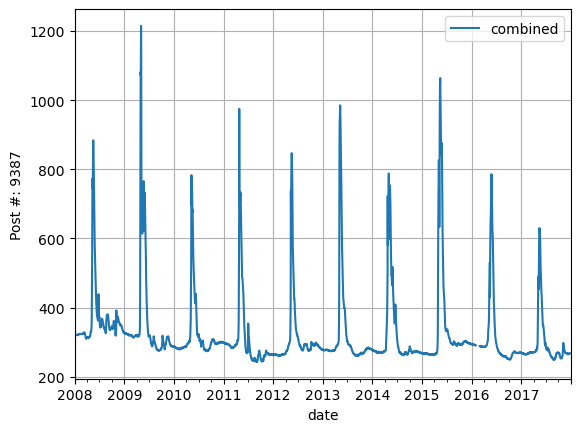

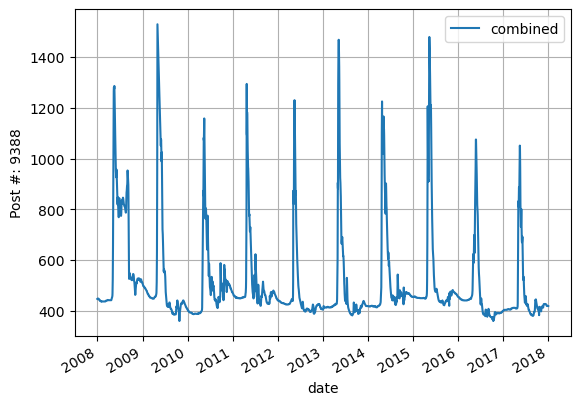

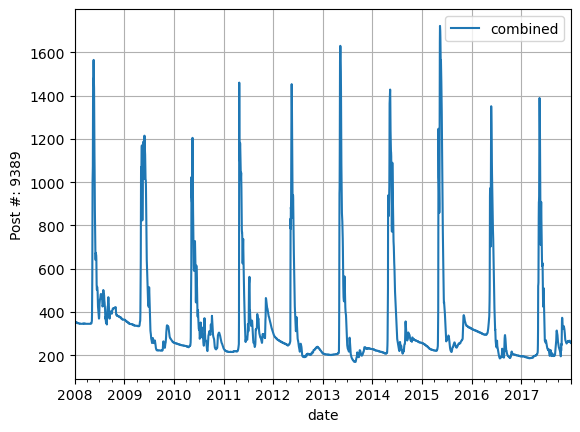

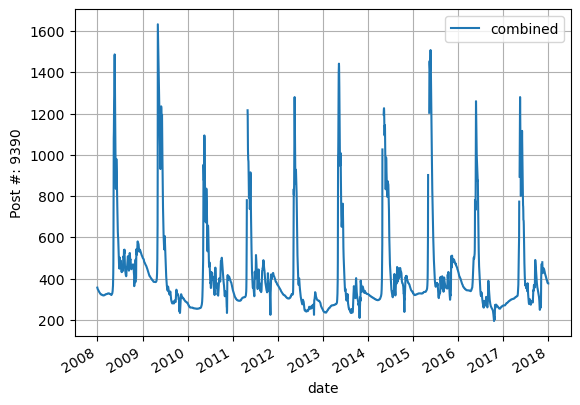

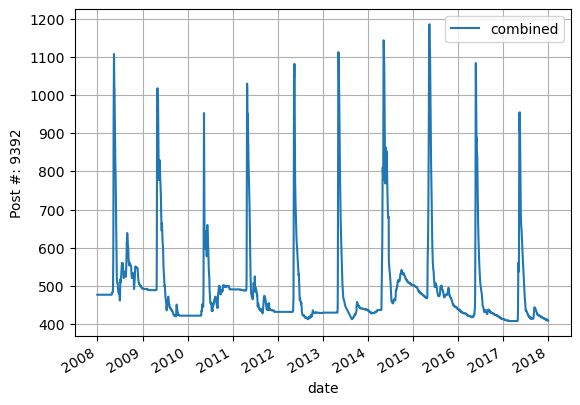

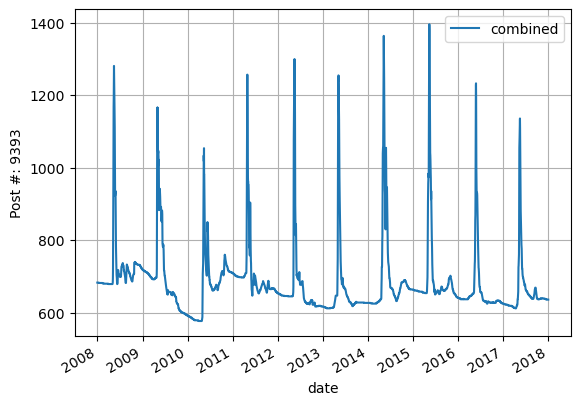

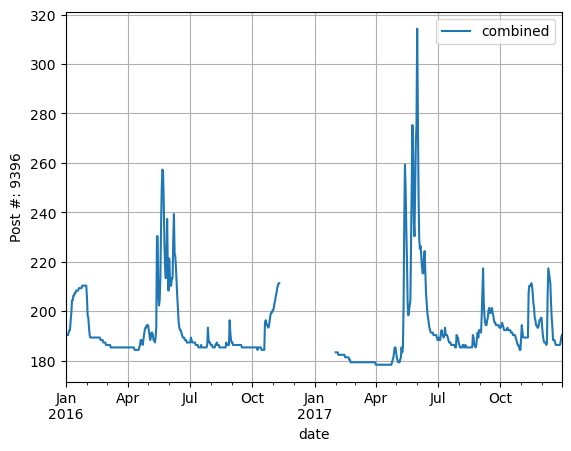

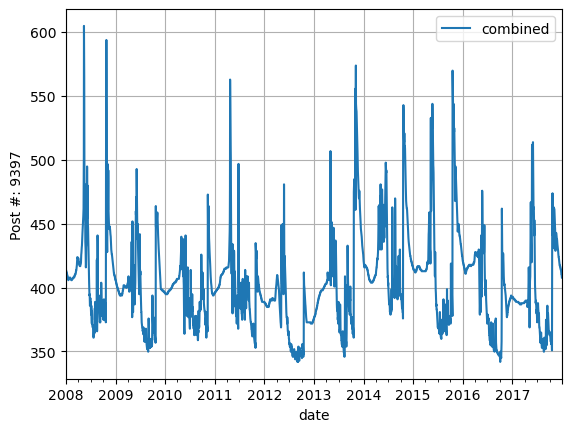

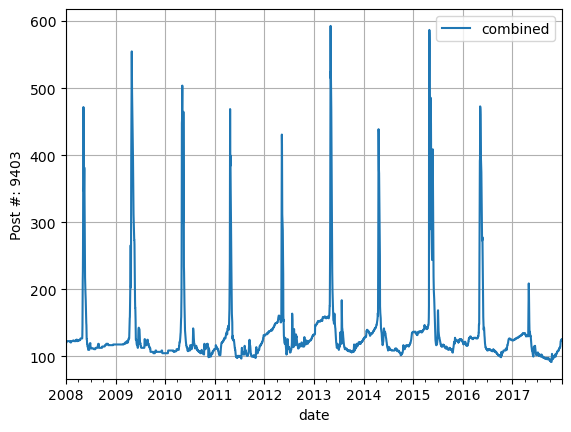

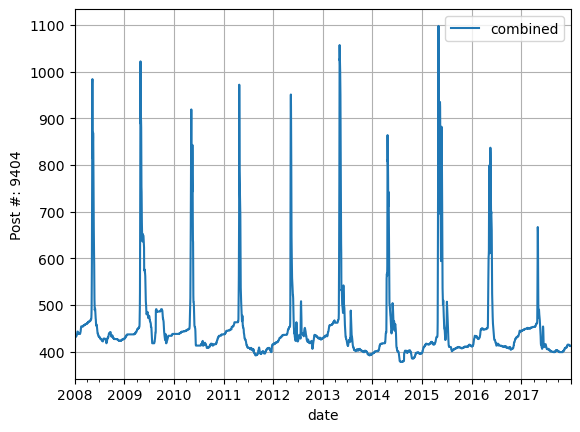

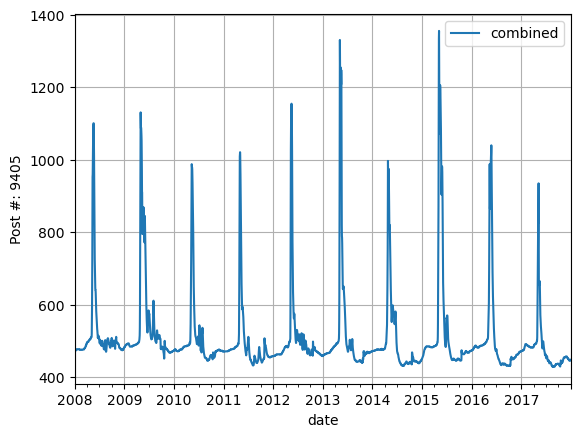

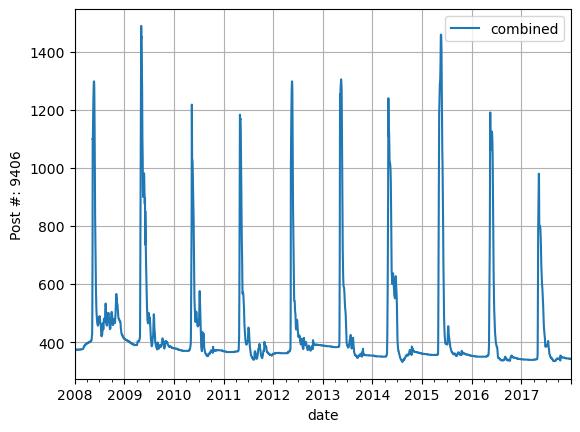

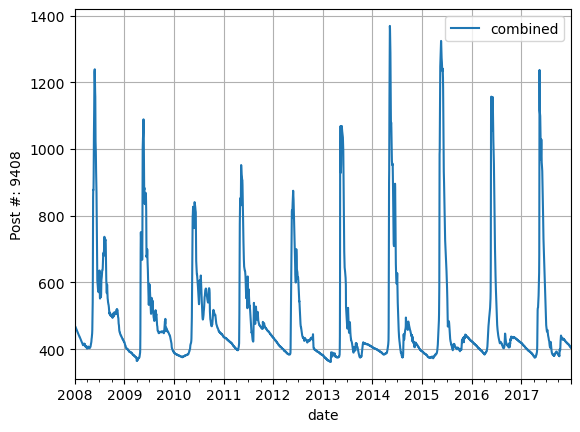

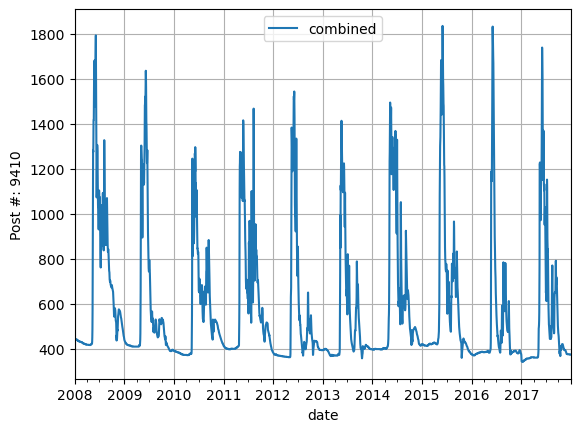

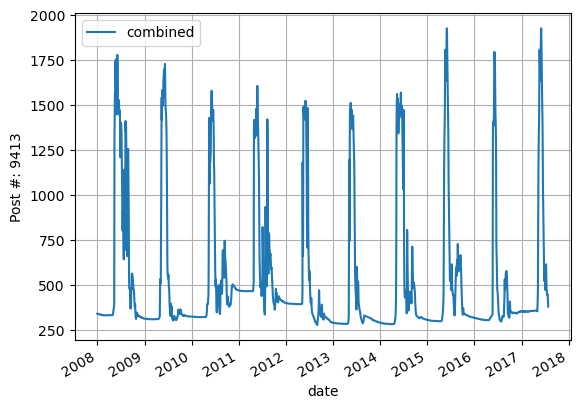

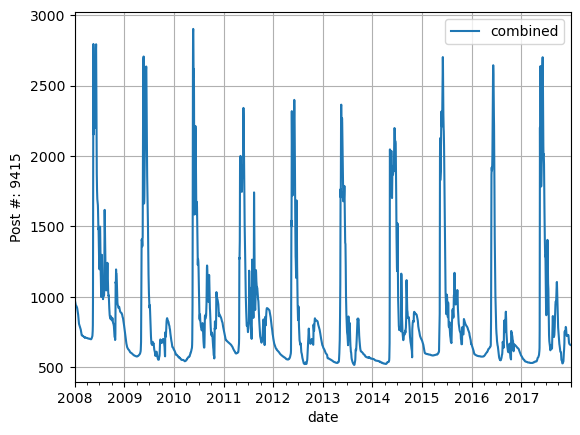

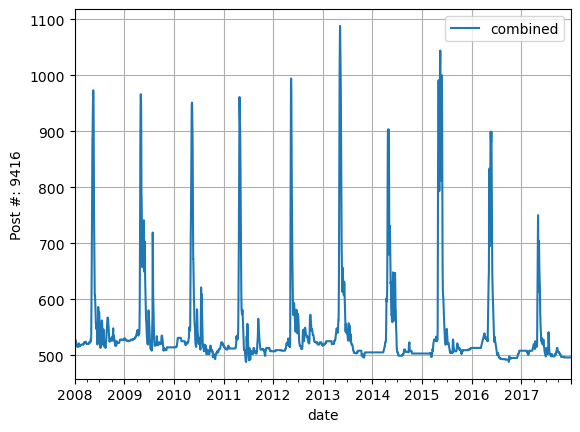

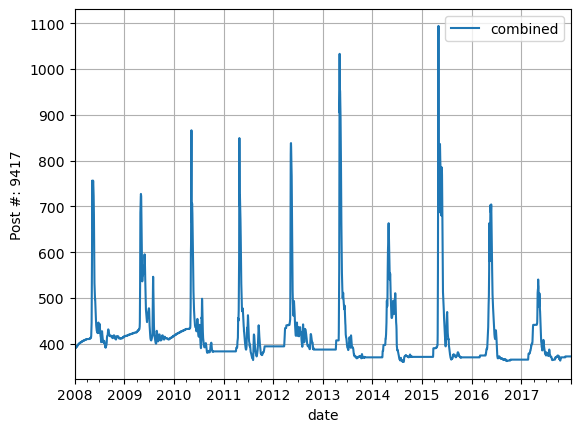

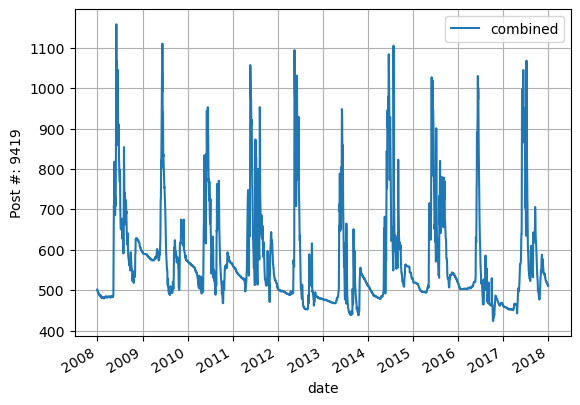

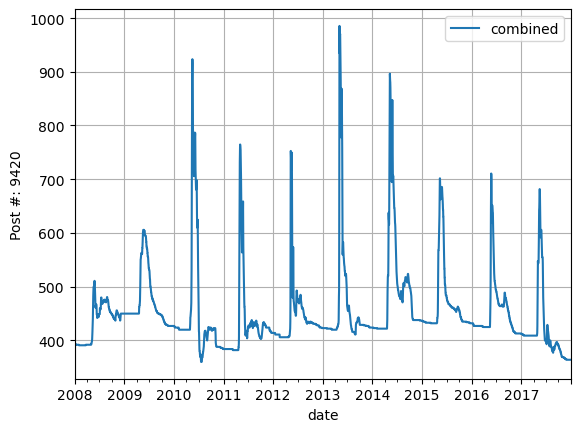

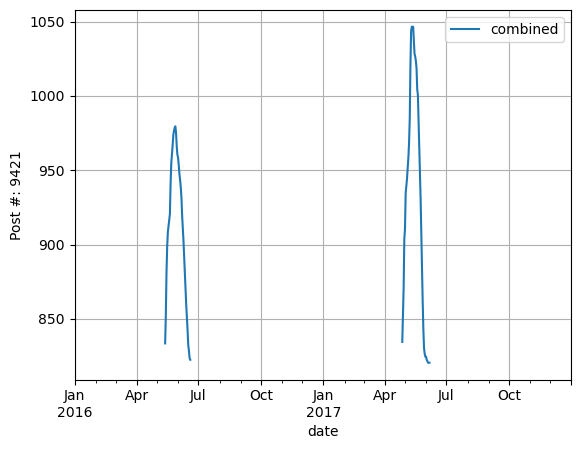

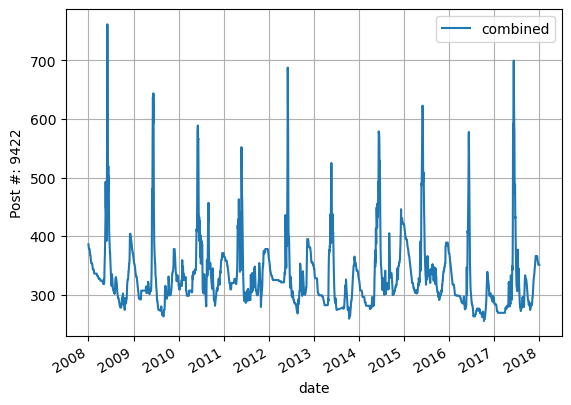

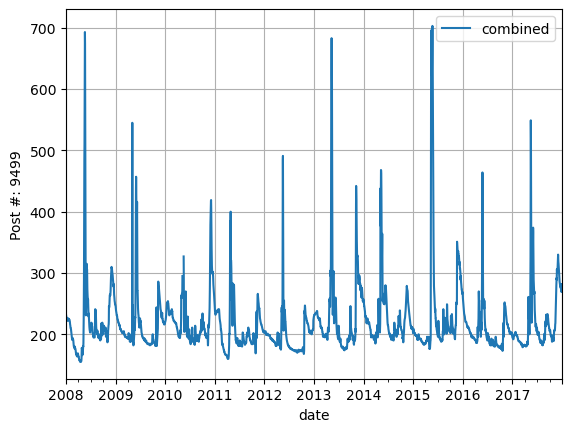

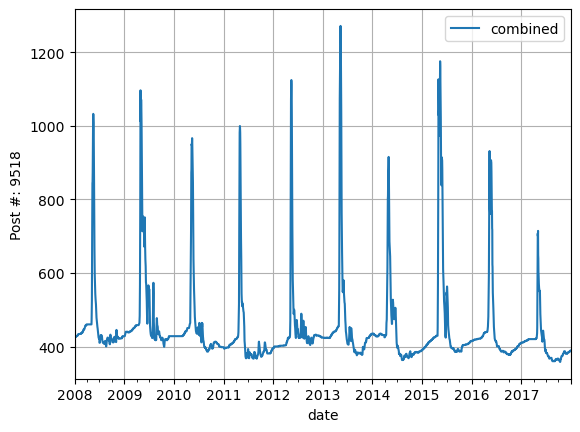

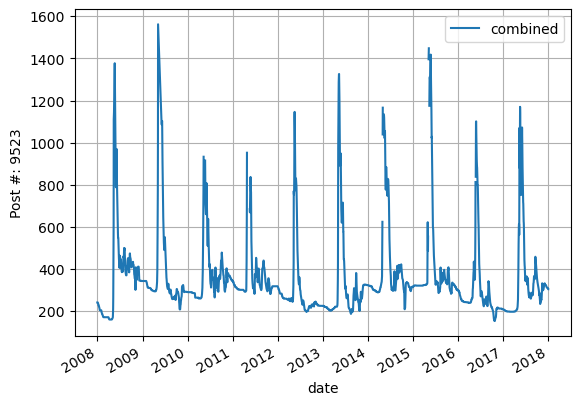

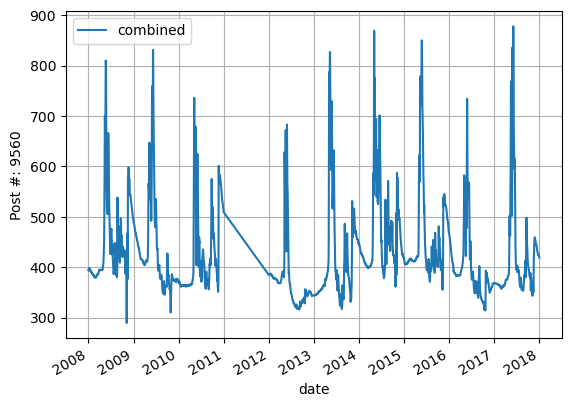

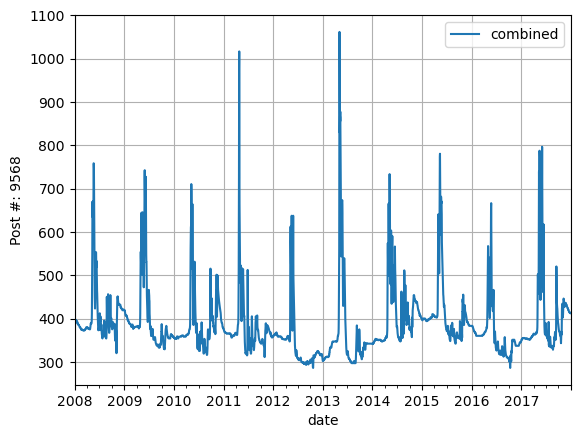

In [9]:
for post_id in sorted(df['post_id'].unique()):
    chunk = df[df['post_id'] == post_id][['date', 'combined']]
    chunk.set_index('date', inplace=True)
    chunk.plot(grid=True, ylabel=f'Post #: {post_id}')